**Rolling Window - Used in time-series analysis to analyze values in a fixed dataset. Finds mean or std_dev**
Used to calculate moving averages, or detect patterns
Steps: 
1. A fixed-size window is placed over the first n data points in a sequence
2. A calculation is performed over the data points within that window, eg, mean, std_dev
3. The window then rolls forward by one data point, and the calculation is performed again on the new subset of data
4. This process repeats until the window has moved across the entire dataset.

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
data = yf.download('TSLA', period="1mo")
print(type(data['Close']['TSLA'])) # Choose the ticker inside the OHLCV columns to choose the Series and not DataFrame


/tmp/ipykernel_134255/3463798582.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TSLA', period="1mo")
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.series.Series'>


/tmp/ipykernel_134255/3754248232.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TSLA', start="2025-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed


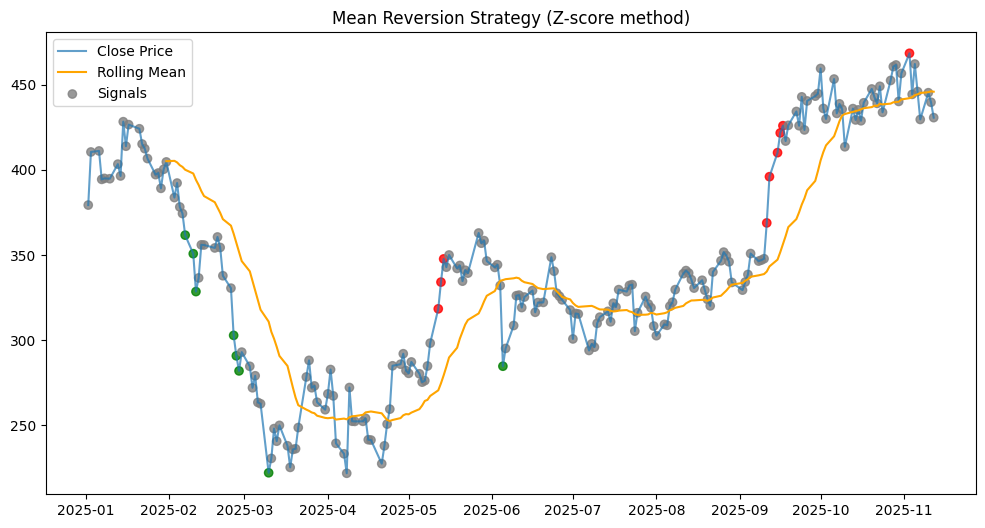

In [23]:
# yf.download('MSFT', period="1mo")
data = yf.download('TSLA', start="2025-01-01", end="2025-11-13")

# Use rolling window to calculate market results
window = 20 # look-back days
# mean_reversion = (current_price - mean ) / std_deviation
data["mean"] = data['Close']['TSLA'].rolling(window).mean()
data["std"] = data['Close']['TSLA'].rolling(window).std()

data["zscore"] = (data['Close']['TSLA'] - data['mean']) / data["std"]

# If zscore is above 2, the price has deviated too far +vely away from the mean, revert by selling(possibility of bearish)
# If zscore is below 2, the price has deviated too far below the mean, revert by buying(possibility of bullish )

#~ Define signal
data["signal"] = 0
data.loc[data["zscore"] > 2, 'signal'] = -1
data.loc[data["zscore"] < -2, 'signal'] = 1

# Plot the data
plt.figure(figsize=(12,6))
plt.plot(data['Close']['TSLA'], label='Close Price', alpha=0.7)
plt.plot(data['mean'], label='Rolling Mean', color='orange')
plt.scatter(data.index, data['Close']['TSLA'], c=data['signal'].map({1: 'green', -1: 'red', 0: 'gray'}), label='Signals', alpha=0.8)
plt.legend()
plt.title("Mean Reversion Strategy (Z-score method)")
plt.show()